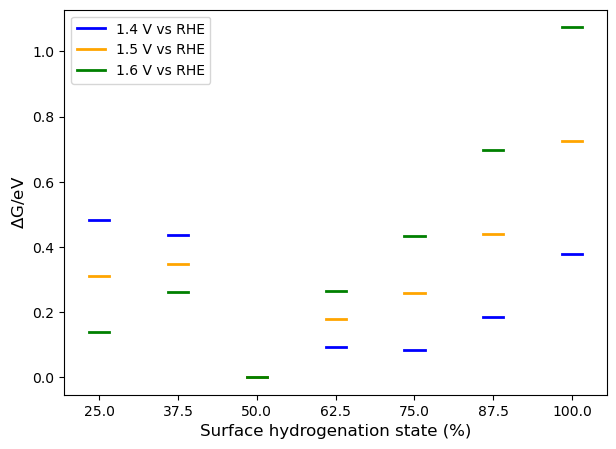

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants and Parameters
Eh2 = -6.77142417 - 0.047446  # P = 0.986923 atm / T = 300K
x = [100, 87.5, 75, 62.5, 50, 37.5, 25]  # Surface hydrogenation states (%)
pH = 14  # pH value

# Protons removal data
Ecorr1 = [3.017749, 3.431789, 3.597448]
a1 = [-0.192312, -0.206979, -0.183896]
b1 = [0.735394, 0.441959, 0.142751]
c1 = [-631.731, -642.1, -652.759]

# Protons addition data
Ecorr2 = [4.420637, 4.258013, 4.014777, 3.799123, 3.597448]
a2 = [-0.233984, -0.254903, -0.254005, -0.231378, -0.183896]
b2 = [-0.820735, -0.626844, -0.284344, -0.0601515, 0.142751]
c2 = [-691.565, -682.111, -672.399, -662.466, -652.759]

# Adjust thermal correction
for i in range(len(a1)):
    c1[i] += 2 * Ecorr1[i]
for i in range(len(a2)):
    c2[i] += 2 * Ecorr2[i]

# Function to compute CHE/GC-DFT curves
def che1(x, E, coef, Eph):
    return E / 2 + coef * (Eh2 / 2 - x)

def che2(x, E, coef, Eph):
    return E / 2 - coef * (Eh2 / 2 - x)

def qf(x, a, b, c, Eph):
    return a * (x - Eph)**2 + b * (x - Eph) + c

# Plot function for each potential U
def plotf(U, line, color, pH):
    Eph = 8.62858e-5 * 300 * pH * math.log(10)  # Energy scale adjustment
    ygc, yche, ygc1, yche1 = [], [], [], []
    x_stretch, y_stretch = [], []

    # Compute y values for protons removal (CHE1) and addition (CHE2)
    for i in range(len(a1)):
        if i != len(a1) - 1:
            ygc1.append(che1(U, qf(U, a1[i], b1[i], c1[i], Eph), len(a1) - 1 - i, Eph))

    for i in range(len(a2)):
        ygc.append(che2(U, qf(U, a2[i], b2[i], c2[i], Eph), len(a2) - 1 - i, Eph))

    for i in range(len(ygc1)):
        ygc.append(ygc1[len(ygc1) - i - 1])

    # Normalize ygc and prepare for plotting
    ref = min(ygc)
    ygc = [y - ref for y in ygc]

    # Stretch the data for better visualization in plot
    for idx in range(len(ygc)):
        x_stretch.extend([x[idx] - x_gap, x[idx] + x_gap, None])
        y_stretch.extend([ygc[idx], ygc[idx], None])

    # Plot the curve for the potential U
    plt.plot(x_stretch, y_stretch, linestyle=line, linewidth=2, c=color, label=f'{U} V vs RHE')

# Main function to setup and execute the plot
def main():
    # Setup plot
    fig = plt.figure(figsize=(7, 5))
    shift = 0.005  # Text shift value
    global x_gap
    x_gap = 1.6  # Gap for stretching points

    # Plot the curves for different potentials
    plotf(1.4, '-', 'blue', pH)
    plotf(1.5, '-', 'orange', pH)
    plotf(1.6, '-', 'green', pH)

    # Customize plot
    plt.legend()
    plt.ylabel('$\Delta$G/eV', fontsize=12)
    plt.xlabel('Surface hydrogenation state (%)', fontsize=12)
    plt.xticks(x)

    # Save the plot to a file
    plt.savefig('/Users/termacor/Downloads/U_surf.pdf', bbox_inches='tight', pad_inches=0.1)
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()

